In [1]:
from collections import defaultdict
import numpy as np
import thinkstats2
import thinkplot
import math
import nsfg

# 02. 分布
描述变量的最佳方法之一是列出该变量在数据集中的值，以及每个值出现的次数。这种描述称为该变量的`分布`（distribution）。

分布最常用的呈现方法是`直方图`，即展示每个值的`频数`的图形。

使用Python计算频数的一种有效方法是使用字典。假设有一个值序列`t`：
```python
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
```

也可以使用`collections`模块中定义的`Counter`类：
```python
counter = Counter(t)
```

还有一个方法是使用pandas方法`value_counts`。

我为本书创建了一个类`Hist`，用来表示直方图，并提供操作方法。

## 2.1 表示直方图
`Hist`的构造函数参数可以是序列、字典、pandas的`Series`对象，或者另一个`Hist`对象：

In [2]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist`对象提供`Freq`方法，其参数为一个值，返回结果是这个值的频数：

In [3]:
hist.Freq(2)

2

方括号操作符也是一样：

In [4]:
hist[2]

2

如果传入的参数值在`Hist`中不存在，频数就是0：

In [5]:
hist.Freq(4)

0

`Values`方法返回Hist对象中值的未排序列表：

In [6]:
hist.Values()

dict_keys([1, 2, 3, 5])

如果需要按序遍历Hist中的值，可以使用内建函数`sorted`：

In [7]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


也可以使用`Items`遍历值-频数对：

In [8]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


## 2.2 绘制直方图
`thinkplot.py`模块基于`matplotlib`包中的pyplot。`thinkplot`的[文档](http://greenteapress.com/thinkstats2/thinkplot.html)。

使用`thinkplot`绘制`hist`对象：

No handles with labels found to put in legend.


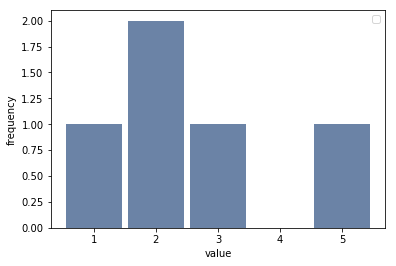

<Figure size 576x432 with 0 Axes>

In [9]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

## 2.3 全国家庭增长调查中的变量
我们使用全国家庭增长调查的数据。本章的代码在`first.py`中。

刚开始使用一个新数据集时，我建议你逐个探索计划用到的变量，使用直方图就是一个很好的方法。

在`1.6节`中，我们将`agepreg`变量的单位从百分之一年转换为年，并将`birthwgt_lb`和`birthwgt_oz`结合生成一个数值`totalwgt_lb`。

首先，读入数据，选取成功生产的记录：

In [10]:
preg = nsfg.ReadFemPreg(dct_file='datasets/2002FemPreg.dct', dat_file='datasets/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]

方括号中的表达式是一个布尔型`Series`，从`DataFrame`中选取满足条件的行，返回一个新的`DataFrame`。接下来，要为成功生产记录的`birthwgt_lb`绘制直方图：

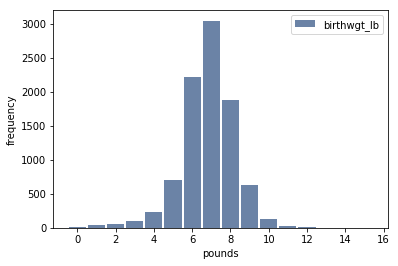

<Figure size 576x432 with 0 Axes>

In [11]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

如果`Hist`方法的参数是一个pandas `Series`对象，对象中的`nan`值都将去除。

结果中出现最多的值为7磅，这个值称为`众数`。这个分布大致为钟形。钟形是`正态分布`，即`高斯分布`的形状。但是，结果的分布是不对称的，尾端向左延伸更长，这一点与正态分布不符。

下图展示了变量`birthwgt_oz`的直方图，该变量表示新生儿体重的盎司值(原始数据包含了体重值分别存储为`磅`和`盎司`)。理论上，我们预期这个分布是`均匀分布`，实际上，0的频数最高，1和15频数最低。这可能是因为调查参与者将接近整数的体重值进行了四舍五入：

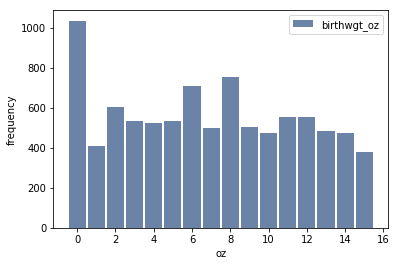

<Figure size 576x432 with 0 Axes>

In [12]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='oz', ylabel='frequency')

下图展示了变量`agepreg`的直方图，该变量表示产妇在妊娠结束时的年龄。这一分布的众数为21岁，分布形状大致为钟形，但是尾端向右延伸较长。大部分产妇年龄为20多岁，较少为30多岁：

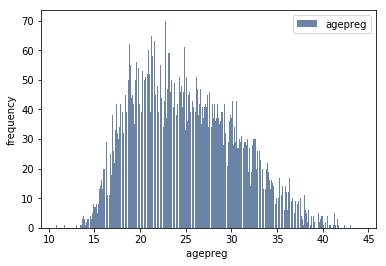

<Figure size 576x432 with 0 Axes>

In [13]:
hist = thinkstats2.Hist(live.agepreg, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='agepreg ', ylabel='frequency')

下图展示了变量`prglngth`的直方图，该变量表示妊娠周数。图中最常出现的值为39周。妊娠期少于39周的并不少见，但是很少有超过43周的。如果妊娠期超过43周，医生通常会进行干预：

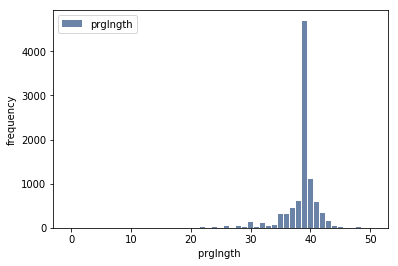

<Figure size 576x432 with 0 Axes>

In [14]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='prglngth ', ylabel='frequency')

## 2.4 离群值
通过观察直方图，我们很容易发现最常出现的值，并能判断分布的形状，但不一定能看到很少出现的值。

在进一步探索数据之前，我们最好检查一下`离群值`。离群值是极端值，可能是测量和记录中出现的错误，也可能是偶然事件的准确汇报。

`Hist`对象提供`Largest`和`Smallest`方法，这两个方法的参数都是整数$n$，分别返回直方图中$n$个最大和最小的值：

In [15]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


在成功生产记录的妊娠期列表中，最小的10个值为`[0, 4, 9, 13, 17, 18, 19, 20, 21, 22]`。10周以下的值肯定是错误的，很可能是结果数据没有进行正确编码；大于30周的数据很可能是正确的；10~30周的数据就很难判断了，有些可能是错误的，但有些可能的确是早产儿。

另一端，最大的10个值为：

In [16]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


当妊娠期超过42周时，大部分医生会建议催产，因此大于42周的数据是令人惊讶的。从医学角度看，50周几乎是不可能的。

处理离群值的最佳方法依赖于`领域知识`，即有关数据来源和意义的信息，另外还取决于你打算对数据进行何种分析。

在这个示例中，我们要解答的问题是第一胎是否会早产。当人们提出这个问题时，他们感兴趣的通常是足月妊娠，因此在这次分析中我将关注超过27周的妊娠记录。

## 2.5 第一胎
现在可以比较第一胎和其他胎的妊娠周数分布了。将成功生产的DataFrame按照`birthord`值进行划分，并计算其直方图：

No handles with labels found to put in legend.


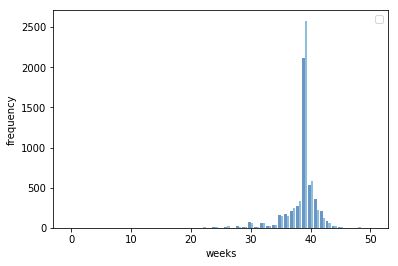

<Figure size 576x432 with 0 Axes>

In [17]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

# 让两个直方图的柱形总宽度为0.9，每对柱形之间留有一些空隙
width = 0.45

# 参数是计划绘制的直方图数量，thinkplot使用这一信息选择适当的绘制颜色
thinkplot.PrePlot(2)

# 通常使用align='center'，从而使每个柱形以其值为中心进行显示
# 这里对两个直方图分别设置了align='right'和'align='left'
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)

thinkplot.Show(xlabel='weeks', ylabel='frequency')

直方图清晰展示了最常出现的变量值，因此非常有用。但是，直方图并不是比较两个变量分布的最佳选择。在这个示例中，`第一胎`的数量比`其他胎`少，因此图中展示的一些明显差异是由样本规模导致的。在下一章中，我们将使用`概率质量函数`解决这个问题。

## 2.6 分布概述
直方图是一个样本分布的完整描述。

如果一个分布的细节很重要，我们可能需要展示其直方图。但是，我们经常只需使用几个描述性的统计量，对变量分布进行一个概述。

我们可能需要描述的变量分布特征有如下这些：
+ **集中趋势**：变量值是否聚集在某个值的附近？
+ **众数**：是否有多个聚集点？
+ **展布**：变量的变化性如何？
+ **尾部**：当值偏离众数时，其概率降低多快？
+ **离群值**：是否有远离众数的极端值？

`汇总统计量`（summary statistic）就是为回答以上这些问题而设计的。目前最常用的汇总统计量是`均值`（mean），用于描述分布的集中趋势（central tendency） 。

如果有一个样本，其中包含$n$个值$x_i$，均值$\bar{x}$就是所有值的总和除以值的个数，即：
+ $\displaystyle \bar x=\frac {1}{n}\sum_i x_i$

`均值`和`平均数`这两个词有时可以互换使用，但有一个区别：
+ 一个样本的`均值`是使用上面的公式计算得到的汇总统计量
+ `平均数`是描述集中趋势的汇总统计量之一

有时，均值可以很好地描述一组值。例如：苹果的大小都差不多。因此，如果我买了6个苹果，总重量为3磅，那么每个苹果约重半磅就是合理的说法。

但是南瓜个体差异比较大。假设我在院子里种了好几种南瓜，某天收获了3个做装饰的南瓜，每个1磅重；2个做派的南瓜，每个3磅重；还有1个Atlantic Giant南瓜，重达591磅。我收获的南瓜样本均值为100磅。但是如果我说`我院子里普通大小的南瓜重100磅`，那就是在误导你。这个例子中不存在具有代表性的南瓜，因此平均值没有意义。

## 2.7 方差
如果我们不能用一个值来概括南瓜的重量，那么使用两个值会好一些：`均值`和`方差`（variance）。

`方差`是用于描述一个分布的变化性或者展布（spread）的汇总统计量。计算方差的公式为：
+ $\displaystyle S^2=\frac {1}{n}\sum_i (x_i-\bar x)^2$

公式中的$x_i-\bar x $称为`离差`，因此`方差`就是离差平方的均值。方差的平方根$S$是`标准差`（standard deviation）。

Pandas数据结构提供计算均值、方差和标准差的方法：

In [18]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
(mean, var, std)

(38.56055968517709, 7.302662067826817, 2.702343810070587)

对于所有成功生产的妊娠数据，妊娠期的均值为38.6周，标准差为2.7周，也就是说，我们认为2~3周的偏差值是正常的。妊娠期的方差为7.3，这个值很难解释，尤其是方差的单位是周的平方，或`平方周`。方差在某些计算中有用，却不是一个很好的汇总统计量。

## 2.8 效应量
`效应量`（effect size）是用于描述效应大小的汇总统计量。例如，要描述两个群组之间的差异，一个显而易见的选择是使用均值的差值。

第一胎妊娠期的均值是38.601，非第一胎的妊娠期均值是38.523。二者差值为0.078周（即13小时），将这个值除以平均的妊娠周数，得出差异约为0.2%。

如果我们假设这个估算是准确的，那么这个差值不具有实际意义。实际上，如果没有对大量妊娠数据进行研究，根本不可能有人会注意到这一差异。

另一个描述效应量的方法是将群组之间的差值与群组内的变化性进行比较。`Cohen's d`就是这样一个统计量，其定义如下：
+ $\displaystyle d=\frac{\bar x_1-\bar x_2}{s}$

其中$\bar x_1$和$\bar x_2$是各群组的均值，$s$是`合并标准差`（pooled standard deviation）：

In [19]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449834

在我们的示例中，两组样本的均值差为0.029个标准差，这个值很小。对比一下，[男性和女性的身高差约为1.7个标准差](https://en.wikipedia.org/wiki/Effect_size)。